In [1]:
"""We define the class for simulating the Rock-Paper-Scissors-Lizard-Spock model."""
import torch
import matplotlib.pyplot as plt
import math
import spectre.model
import spectre.spectrum_general
from spectre.spectrum_general import matrix_solution
from spectre.spectrum_general import sim_solution
from spectre.spectrum_general import element_wise
from spectre.spectrum_general import sim_solution
from spectre.spectrum_general import recursive_solution
from spectre.model import RPS
import os
import numpy as np

os.chdir('..')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

fileloc = r'figures/RPS/'

In [2]:
"""Define the colors for the different methods"""
color_recursive = '#FFA353'
color_elementwise =  '#095400'
color_matrix =  '#1B3B9D'
color_sim = 'k'

linewidth_recursive = 12
linewidth_elementwise = 3.5
marker_matrix = 8
simulation_marker = 12

font_size = 28

In [3]:
"""Define the RPS system"""
n = 5 # number of strategies
eta = 0.01 # S.D. of the noise
model = RPS(n, eta=eta, noise_type="multiplicative") # create the RPS object
model.mu = 0.01

In [4]:
"""Define the simulation parameters"""
ndivs = 15
n_points = int(2e6)
time = 25000
# time = 25
dt = 0.5e-1

In [5]:
"""Define the frequency vectors"""
min_freq = 1e-3
max_freq = 10
n_freq_mat = 60
n_freq_rat = 1000

"""Define the frequency vectors for the matrix and rational solutions"""
freq_mat = torch.logspace(np.log10(min_freq), np.log10(max_freq), n_freq_mat)
freq_rat = torch.logspace(np.log10(min_freq), np.log10(max_freq), n_freq_rat)

In [6]:
"""Find auto-spectra using different schemes"""
idx = 1 # index of the population we are interested in (Paper population)

"""Analytical solution (matrix)"""
mat_model = matrix_solution(model.J, model.L, model.S)
psd_matrix, _ = mat_model.auto_spectrum(idx, freq_mat)

"""Analytical solution (elementwise)"""
rat_model = element_wise(model.J, model.L, model.S)
psd_rational, _ = rat_model.auto_spectrum(idx, freq_rat)

"""Analytical solution (recursive algorithm)"""
recursive_model = recursive_solution(model.J, model.L, model.S)
psd_recursive, _ = recursive_model.auto_spectrum(idx, freq_rat)

"""Simulation solution"""
sim_model = sim_solution(model)
psd_sim, f = sim_model.simulation_spectrum(i=idx, ndivs=ndivs, n_points=n_points, time=time, dt=dt)

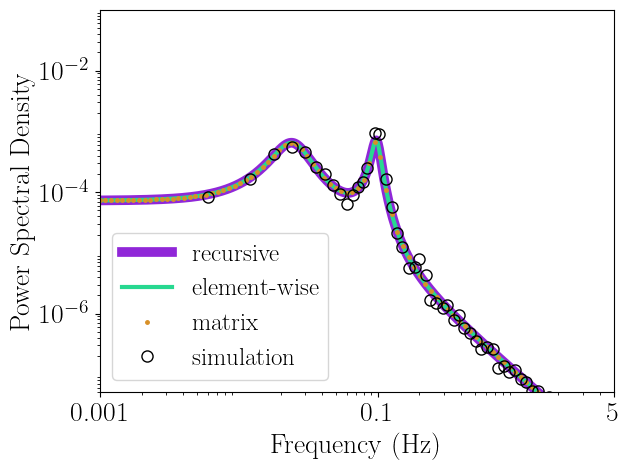

In [7]:
plt.figure(1)
idx_closest = torch.unique(torch.abs(f[1:, None] - freq_mat).argmin(axis=0)) + 1
plt.loglog(freq_rat, psd_recursive, label='recursive', linewidth=linewidth_recursive, color=color_recursive)
plt.loglog(freq_rat, psd_rational, label='element-wise', linewidth=linewidth_elementwise, color=color_elementwise)
plt.loglog(freq_mat, psd_matrix, label='matrix', linewidth=0, marker='s', markersize=marker_matrix, color=color_matrix)
plt.loglog(f[idx_closest], psd_sim[idx_closest], label='simulation', linewidth=0, marker='o', markersize=8, markerfacecolor='none',color=color_sim)
plt.legend(fontsize=18, loc='lower left')
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Power Spectral Density', fontsize=20)
plt.xticks([1e-3, 1e-1, 5], ['0.001', '0.1', '5'], fontsize=20)
plt.yticks([1e-8, 1e-6, 1e-4, 1e-2], fontsize=20)
plt.xlim([1e-3, 5])
plt.ylim([5e-8, 1e-1])
plt.tight_layout()
plt.savefig(fileloc + 'psd_rps.svg', format='svg', dpi=1200)
plt.show()

In [7]:
"""Plot the cross-spectrum between Rock and Paper populations"""
i = 0
j = 1

"""Analytical solution (matrix)"""
mat_model = matrix_solution(model.J, model.L, model.S)
cpsd_matrix, _ = mat_model.cross_spectrum(i, j, freq_mat)

"""Analytical solution (elementwise)"""
rat_model = element_wise(model.J, model.L, model.S)
cpsd_rational, _ = rat_model.cross_spectrum(i, j, freq_rat)

"""Analytical solution (recursive algorithm)"""
recursive_model = recursive_solution(model.J, model.L, model.S)
cpsd_recursive, _ = recursive_model.cross_spectrum(i, j, freq_rat)

"""Simulation solution"""
sim_model = sim_solution(model)
cpsd_sim, f = sim_model.simulation_spectrum(i=i, j=j, ndivs=ndivs, n_points=n_points, time=time, dt=dt)

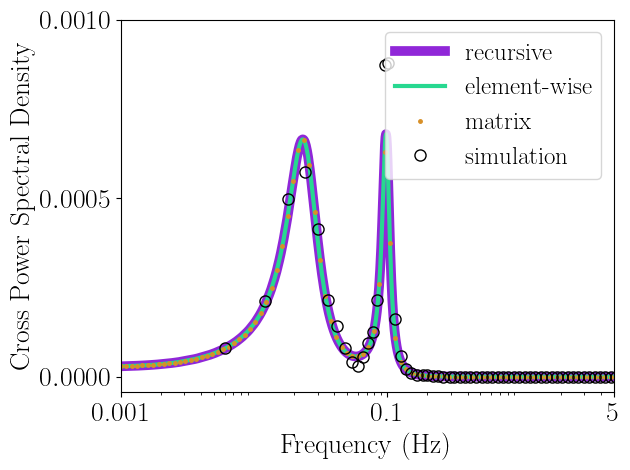

In [14]:
plt.figure(2)
idx_closest = torch.unique(torch.abs(f[1:, None] - freq_mat).argmin(axis=0)) + 1
plt.semilogx(freq_rat, torch.abs(cpsd_recursive), label='recursive', linewidth=linewidth_recursive, color=color_recursive)
plt.semilogx(freq_rat, torch.abs(cpsd_rational), label='element-wise', linewidth=linewidth_elementwise, color=color_elementwise)
plt.semilogx(freq_mat, torch.abs(cpsd_matrix), label='matrix', linewidth=0, marker='s', markersize=marker_matrix, color=color_matrix)
plt.semilogx(f[idx_closest], torch.abs(cpsd_sim[idx_closest]), label='simulation', linewidth=0, marker='o', markersize=8, markerfacecolor='none', color='k')
plt.legend(fontsize=18, loc='upper right')
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Cross Power Spectral Density', fontsize=20)
plt.xticks([1e-3, 1e-1, 5], ['0.001', '0.1', '5'], fontsize=20)
plt.yticks([0, 0.0005, 0.001], fontsize=20)
plt.xlim([1e-3, 5])
# plt.ylim([1e-8, 1e-1])
plt.tight_layout()
plt.savefig(fileloc + 'cpsd_rps_absolute.svg', format='svg', dpi=1200)
plt.show()

In [8]:
"""Plot the coherence between Rock and Paper populations"""
i = 0
j = 1

"""Analytical solution (matrix)"""
mat_model = matrix_solution(model.J, model.L, model.S)
coh_matrix, _ = mat_model.coherence(i=i, j=j, freq=freq_mat)

"""Analytical solution (elementwise)"""
rat_model = element_wise(model.J, model.L, model.S)
coh_rational, _ = rat_model.coherence(i, j, freq_rat)

"""Analytical solution (recursive algorithm)"""
recursive_model = recursive_solution(model.J, model.L, model.S)
coh_recursive, _ = recursive_model.coherence(i, j, freq_rat)

"""Simulation solution"""
sim_model = sim_solution(model)
coh_sim, f = sim_model.simulation_coherence(i=i, j=j, ndivs=ndivs, n_points=n_points, time=time, dt=dt)

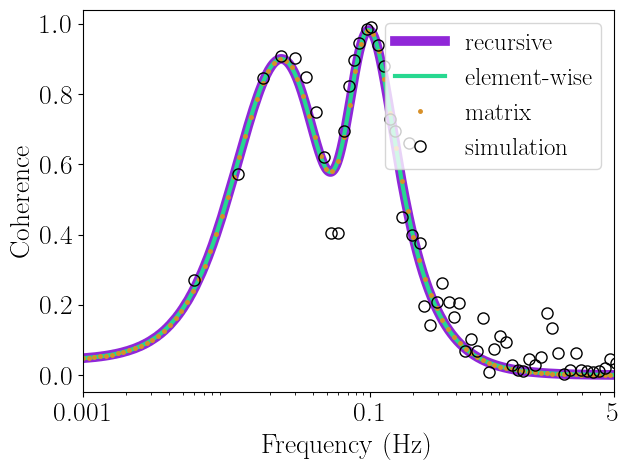

In [11]:
plt.figure(3)
idx_closest = torch.unique(torch.abs(f[1:, None] - freq_mat).argmin(axis=0)) + 1
plt.semilogx(freq_rat, torch.abs(coh_recursive), label='recursive', linewidth=linewidth_recursive, color=color_recursive)
plt.semilogx(freq_rat, torch.abs(coh_rational), label='element-wise', linewidth=linewidth_elementwise, color=color_elementwise)
plt.semilogx(freq_mat, torch.abs(coh_matrix), label='matrix', linewidth=0, marker='s', markersize=marker_matrix, color=color_matrix)
plt.semilogx(f[idx_closest], torch.abs(coh_sim[idx_closest]), label='simulation', linewidth=0, marker='o', markersize=8, markerfacecolor='none', color='k')
plt.legend(fontsize=18, loc='upper right')
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Coherence', fontsize=20)
plt.xticks([1e-3, 1e-1, 5], ['0.001', '0.1', '5'], fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=20)
plt.xlim([1e-3, 5])
# plt.ylim([0, 1])
plt.tight_layout()
plt.savefig(fileloc + 'coh_rps.svg', format='svg', dpi=1200)
plt.show()

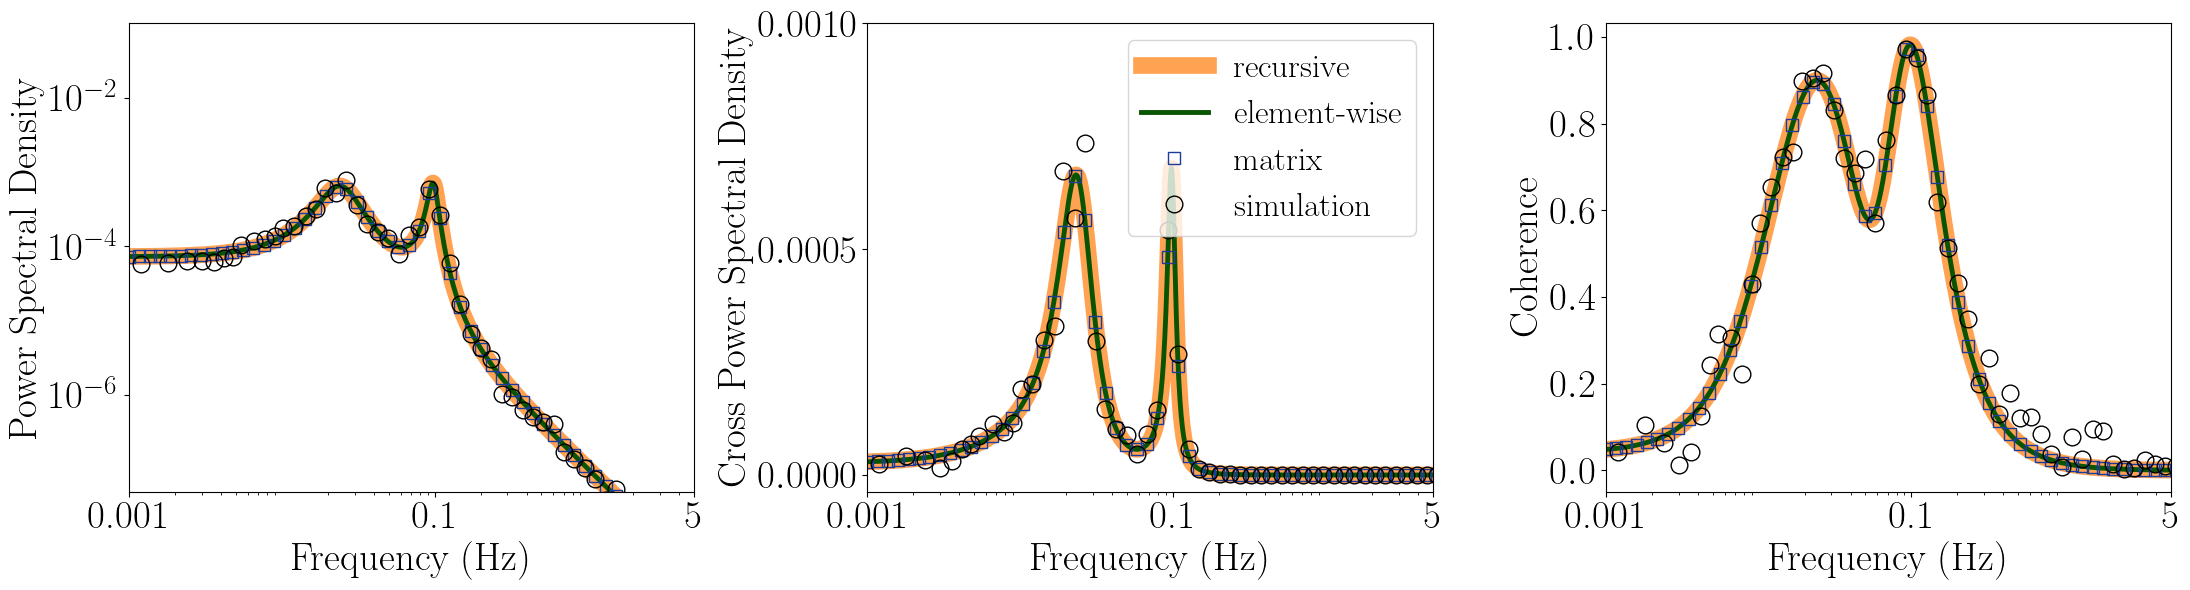

In [9]:
"""Combined figure"""
fig, ax = plt.subplots(1, 3, figsize=(22, 6))

idx_closest = torch.unique(torch.abs(f[1:, None] - freq_mat).argmin(axis=0)) + 1
ax[0].loglog(freq_rat, psd_recursive, label='recursive', linewidth=linewidth_recursive, color=color_recursive)
ax[0].loglog(freq_rat, psd_rational, label='element-wise', linewidth=linewidth_elementwise, color=color_elementwise)
ax[0].loglog(freq_mat, psd_matrix, label='matrix', linewidth=0, marker='s',markerfacecolor='none', markersize=marker_matrix, color=color_matrix)
ax[0].loglog(f[idx_closest], psd_sim[idx_closest], label='simulation', linewidth=0, marker='o', markersize=simulation_marker, markerfacecolor='none',color='k')
# ax[0].legend(fontsize=18, loc='lower left')
ax[0].set_xlabel('Frequency (Hz)', fontsize=font_size)
ax[0].set_ylabel('Power Spectral Density', fontsize=font_size)
ax[0].set_xticks([1e-3, 1e-1, 5], ['0.001', '0.1', '5'])
ax[0].set_yticks([1e-8, 1e-6, 1e-4, 1e-2])
ax[0].tick_params(axis='x', labelsize=font_size)
ax[0].tick_params(axis='y', labelsize=font_size)
ax[0].set_xlim([1e-3, 5])
ax[0].set_ylim([5e-8, 1e-1])

idx_closest = torch.unique(torch.abs(f[1:, None] - freq_mat).argmin(axis=0)) + 1
ax[1].semilogx(freq_rat, torch.abs(cpsd_recursive), label='recursive', linewidth=linewidth_recursive, color=color_recursive)
ax[1].semilogx(freq_rat, torch.abs(cpsd_rational), label='element-wise', linewidth=linewidth_elementwise, color=color_elementwise)
ax[1].semilogx(freq_mat, torch.abs(cpsd_matrix), label='matrix', linewidth=0, marker='s',markerfacecolor='none', markersize=marker_matrix, color=color_matrix)
ax[1].semilogx(f[idx_closest], torch.abs(cpsd_sim[idx_closest]), label='simulation', linewidth=0, marker='o', markersize=simulation_marker, markerfacecolor='none', color='k')
ax[1].legend(fontsize=24, loc='upper right')
ax[1].set_xlabel('Frequency (Hz)', fontsize=font_size)
ax[1].set_ylabel('Cross Power Spectral Density', fontsize=font_size)
ax[1].set_xticks([1e-3, 1e-1, 5], ['0.001', '0.1', '5'])
ax[1].set_yticks([0, 0.0005, 0.001])
ax[1].tick_params(axis='x', labelsize=font_size)
ax[1].tick_params(axis='y', labelsize=font_size)
# set ytick fontsize larger
ax[1].set_xlim([1e-3, 5])
# ax[1].set_ylim([1e-8, 1e-1])


idx_closest = torch.unique(torch.abs(f[1:, None] - freq_mat).argmin(axis=0)) + 1
ax[2].semilogx(freq_rat, torch.abs(coh_recursive), label='recursive', linewidth=linewidth_recursive, color=color_recursive)
ax[2].semilogx(freq_rat, torch.abs(coh_rational), label='element-wise', linewidth=linewidth_elementwise, color=color_elementwise)
ax[2].semilogx(freq_mat, torch.abs(coh_matrix), label='matrix', linewidth=0, marker='s',markerfacecolor='none', markersize=marker_matrix, color=color_matrix)
ax[2].semilogx(f[idx_closest], torch.abs(coh_sim[idx_closest]), label='simulation', linewidth=0, marker='o', markersize=simulation_marker, markerfacecolor='none', color='k')
# ax[2].legend(fontsize=18, loc='upper right')
ax[2].set_xlabel('Frequency (Hz)', fontsize=font_size)
ax[2].set_ylabel('Coherence', fontsize=font_size)
ax[2].set_xticks([1e-3, 1e-1, 5], ['0.001', '0.1', '5'])
ax[2].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[2].tick_params(axis='x', labelsize=font_size)
ax[2].tick_params(axis='y', labelsize=font_size)
ax[2].set_xlim([1e-3, 5])
# ax[2].set_ylim([0, 1])

plt.tight_layout()
plt.savefig(fileloc + 'combined_RPS.svg', format='svg', dpi=1200)
plt.show()

In [10]:
"""Define the mutation parameter (mu) tensor"""
pts = 1000
mu_min = 0.001
mu_max = 1
mu0 = torch.logspace(start=math.log10(mu_min), end=math.log10(mu_max), steps=pts)
inv_idx = torch.arange(mu0.size(0)-1, -1, -1).long()
inv_tensor = mu0.index_select(0, inv_idx)
mu = mu0[inv_idx]

In [11]:
"""Coefficients of the numerator and denominator"""
dim = model.dim
p = torch.empty(dim, pts)
q = torch.empty(dim+1, pts)

"""Make The Coefficient of omega in Numerator and Denominator plots"""
for i in range(pts):
    model.mu = mu[i]
    model.jacobian()
    rat_model = element_wise(model.J, model.L, model.S)
    p[:, i] = torch.Tensor(rat_model.p_auto_all_coeffs(idx))
    q[:, i] = torch.Tensor(rat_model.q_all_coeffs())

In [12]:
"""Make the mu vector for which the spectrum has to be calculated"""
mu_spect = torch.tensor([mu_min, mu_max])
for i in range(dim):
    id = torch.where(p[i, :] < 0)[0]
    if id.size(0) > 0:
        mu_spect = torch.cat((mu_spect, mu[id[0]].flatten()))

for i in range(dim+1):
    id = torch.where(q[i, :] < 0)[0]
    if id.size(0) > 0:
        mu_spect = torch.cat((mu_spect, mu[id[0]].flatten()))

mu_spect = torch.sort(mu_spect.unique())[0]

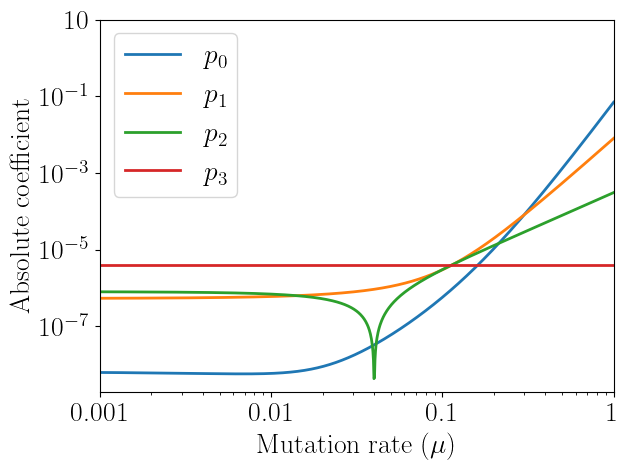

In [13]:
"""Plot the Absolute Value of the Coefficients of omega in Numerator"""
plt.figure(4)
plt.clf()
for i in range(dim):
    plt.plot(mu, torch.abs(p[i, :]), label=r'$p_{}$'.format(i), linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20, loc='upper left')
plt.xlabel('Mutation rate ($\mu$)', fontsize=20)
plt.ylabel('Absolute coefficient', fontsize=20)
plt.xticks([1e-3, 1e-2, 1e-1, 1], ['0.001', '0.01', '0.1', '1'], fontsize=20)
plt.yticks([1e-7, 1e-5, 1e-3, 1e-1, 1e1], ['$10^{-7}$', '$10^{-5}$', '$10^{-3}$', '$10^{-1}$', '$10$'], fontsize=20)
plt.xlim([1e-3, 1])
# plt.ylim([1e-10, 1e-5])
plt.tight_layout()
plt.savefig(fileloc + 'p_abs_coeffs.svg', format='svg', dpi=1200)
plt.show()

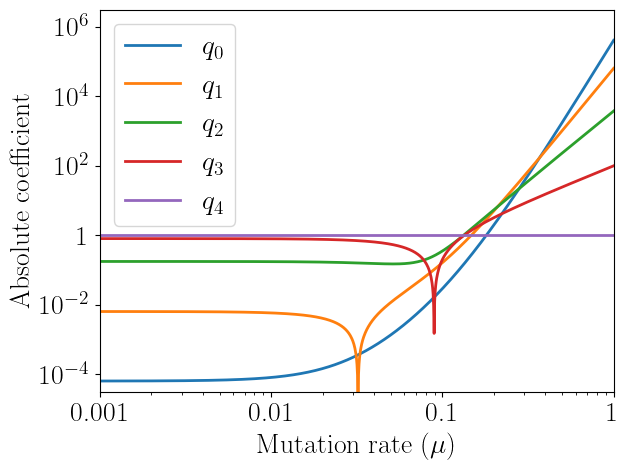

In [14]:
"""Plot the Absolute Value of the Coefficients of omega in Denominator"""
plt.figure(5)
plt.clf()
for i in range(dim+1):
    plt.loglog(mu, torch.abs(q[i, :]), label=r'$q_{}$'.format(i), linewidth=2)
plt.legend(fontsize=20, loc='upper left')
plt.xlabel('Mutation rate ($\mu$)', fontsize=20)
plt.ylabel('Absolute coefficient', fontsize=20)
plt.xticks([1e-3, 1e-2, 1e-1, 1], ['0.001', '0.01', '0.1', '1'], fontsize=20)
plt.yticks([1e-4, 1e-2, 1e0, 1e2, 1e4, 1e6], ['$10^{-4}$', '$10^{-2}$', '$1$', '$10^2$', '$10^4$', '$10^6$'], fontsize=20)
plt.xlim([1e-3, 1])
plt.ylim([3e-5, 3e6])
plt.tight_layout()
plt.savefig(fileloc + 'q_coeffs.svg', format='svg', dpi=1200)
plt.show()

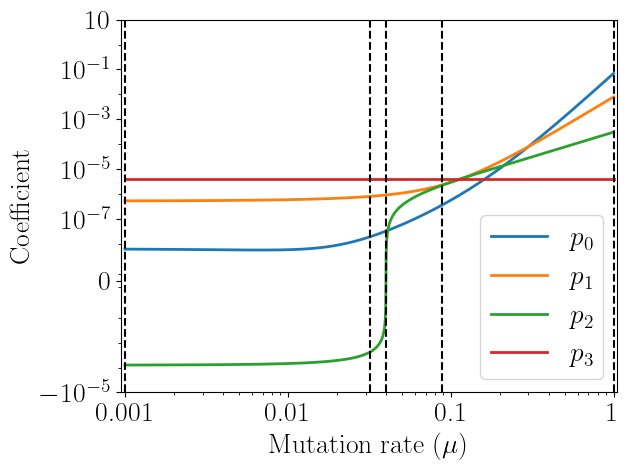

In [15]:
"""Plot the Coefficients of omega in Numerator"""
plt.figure(6)
plt.clf()
for i in range(dim):
    plt.plot(mu, p[i, :], label=r'$p_{}$'.format(i), linewidth=2)
threshold = torch.min(torch.abs(p)).item()
plt.yscale('symlog', linthresh=threshold)
plt.xscale('log')
for i in range(mu_spect.size(0)):
    plt.axvline(mu_spect[i], color='k', linestyle='--')
plt.legend(fontsize=20, loc='lower right')
plt.xlabel('Mutation rate ($\mu$)', fontsize=20)
plt.ylabel('Coefficient', fontsize=20)
plt.xticks([1e-3, 1e-2, 1e-1, 1], ['0.001', '0.01', '0.1', '1'], fontsize=20)
plt.yticks([-1e-5, 0, 1e-7, 1e-5, 1e-3, 1e-1, 1e1], ['$-10^{-5}$', '0', '$10^{-7}$', '$10^{-5}$', '$10^{-3}$', '$10^{-1}$', '$10$'], fontsize=20)
plt.xlim([0.95e-3, 1.05])
# plt.ylim([1e-10, 1e-5])
plt.tight_layout()
plt.savefig(fileloc + 'p_coeffs.svg', format='svg', dpi=1200)
plt.show()

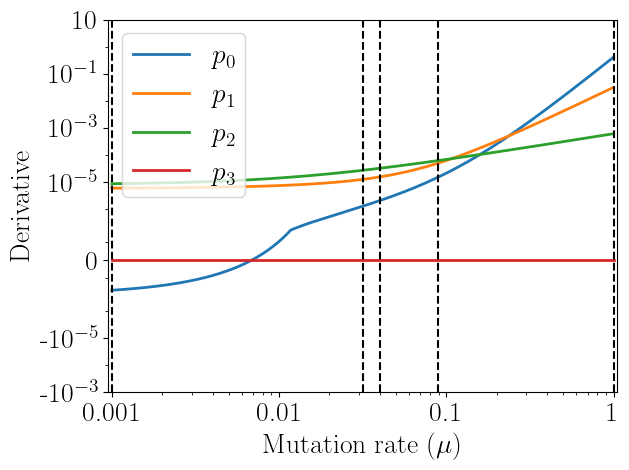

In [16]:
"""Plot the derivative of the Coefficients of omega in Numerator"""
# Using central difference method, the derivative is
dp = torch.empty(dim, pts)
for i in range(dim):
    dp[i, 1:-1] = (p[i, 2:] - p[i, :-2]) / (mu[2:] - mu[:-2])
    dp[i, 0] = (p[i, 1] - p[i, 0]) / (mu[1] - mu[0])
    dp[i, -1] = (p[i, -1] - p[i, -2]) / (mu[-1] - mu[-2])

plt.figure(7)
plt.clf()
for i in range(dim):
    plt.plot(mu, dp[i, :], label=r'$p_{}$'.format(i), linewidth=2)
threshold = torch.abs(torch.min(dp)).item()
plt.yscale('symlog', linthresh=threshold)
plt.xscale('log')
for i in range(mu_spect.size(0)):
    plt.axvline(mu_spect[i], color='k', linestyle='--')
plt.legend(fontsize=20, loc='upper left')
plt.xlabel('Mutation rate ($\mu$)', fontsize=20)
plt.ylabel('Derivative', fontsize=20)
plt.xticks([1e-3, 1e-2, 1e-1, 1], ['0.001', '0.01', '0.1', '1'], fontsize=20)
plt.yticks([-1e-3, -1e-5, 0, 1e-5, 1e-3, 1e-1, 10], ['-$10^{-3}$', '-$10^{-5}$', '0', '$10^{-5}$', '$10^{-3}$', '$10^{-1}$', '$10$'], fontsize=20)
plt.xlim([0.95e-3, 1.05])
# plt.ylim([1e-10, 1e-5])
plt.tight_layout()
plt.savefig(fileloc + 'p_coeffs_deriv.svg', format='svg', dpi=1200)
plt.show()

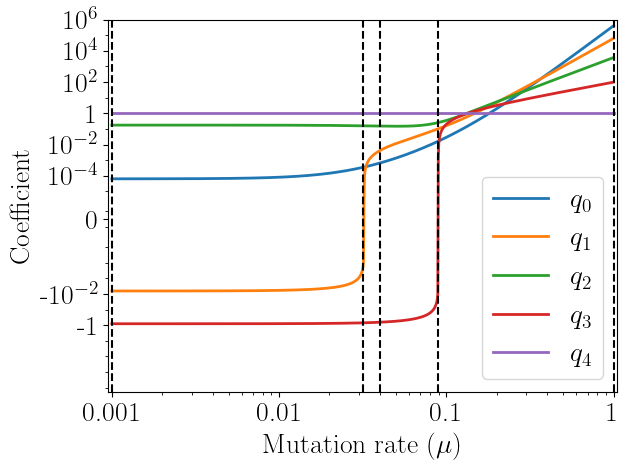

In [17]:
"""Plot the Coefficients of omega in Denominator"""
plt.figure(8)
plt.clf()
for i in range(dim+1):
    plt.plot(mu, q[i, :], label=r'$q_{}$'.format(i), linewidth=2)
for i in range(mu_spect.size(0)):
    plt.axvline(mu_spect[i], color='k', linestyle='--')
threshold = torch.min(torch.abs(q)).item()
plt.yscale('symlog', linthresh=threshold)
plt.xscale('log')
plt.legend(fontsize=20, loc='lower right')
plt.xlabel('Mutation rate ($\mu$)', fontsize=20)
plt.ylabel('Coefficient', fontsize=20)
plt.xticks([1e-3, 1e-2, 1e-1, 1], ['0.001', '0.01', '0.1', '1'], fontsize=20)
plt.yticks([-1, -1e-2, 0, 1e-4, 1e-2, 1e0, 1e2, 1e4, 1e6], ['-1','-$10^{-2}$','0','$10^{-4}$', '$10^{-2}$', '$1$', '$10^2$', '$10^4$', '$10^6$'], fontsize=20)
plt.xlim([0.95e-3, 1.05])
# plt.ylim([1e-10, 1e-5])
plt.tight_layout()
plt.savefig(fileloc + 'q_coeffs.svg', format='svg', dpi=1200)
plt.show()

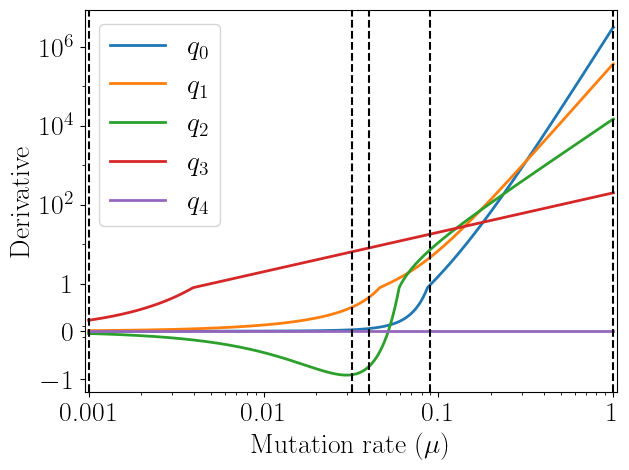

In [18]:
"""Plot the derivative of the Coefficients of omega in Denominator"""
# Using central difference method, the derivative is
dq = torch.empty(dim+1, pts)
for i in range(dim+1):
    dq[i, 1:-1] = (q[i, 2:] - q[i, :-2]) / (mu[2:] - mu[:-2])
    dq[i, 0] = (q[i, 1] - q[i, 0]) / (mu[1] - mu[0])
    dq[i, -1] = (q[i, -1] - q[i, -2]) / (mu[-1] - mu[-2])

plt.figure(9)
plt.clf()
for i in range(dim+1):
    plt.plot(mu, dq[i, :], label=r'$q_{}$'.format(i), linewidth=2)
threshold = torch.abs(torch.min(dq)).item()
plt.yscale('symlog', linthresh=threshold)
plt.xscale('log')
for i in range(mu_spect.size(0)):
    plt.axvline(mu_spect[i], color='k', linestyle='--')
plt.legend(fontsize=20, loc='upper left')
plt.xlabel('Mutation rate ($\mu$)', fontsize=20)
plt.ylabel('Derivative', fontsize=20)
plt.xticks([1e-3, 1e-2, 1e-1, 1], ['0.001', '0.01', '0.1', '1'], fontsize=20)
plt.yticks([-1, 0, 1, 1e2, 1e4, 1e6], ['$-1$', '$0$', '$1$', '$10^{2}$', '$10^{4}$', '$10^{6}$'], fontsize=20)
plt.xlim([0.95e-3, 1.05])
# plt.ylim([1e-10, 1e-5])
plt.tight_layout()
plt.savefig(fileloc + 'q_coeffs_deriv.svg', format='svg', dpi=1200)
plt.show()

In [19]:
"""Find the Power Spectral Density for of each of the mu_spect"""
freq = torch.logspace(start=math.log10(0.001), end=math.log10(10), steps=1000)
psd_mu = torch.empty(freq.size(0), mu_spect.size(0))
for i in range(mu_spect.size(0)):
    model.mu = mu_spect[i]
    model.jacobian()
    rat_model = element_wise(model.J, model.L, model.S)
    psd_mu[:, i], _ = rat_model.auto_spectrum(idx, freq)

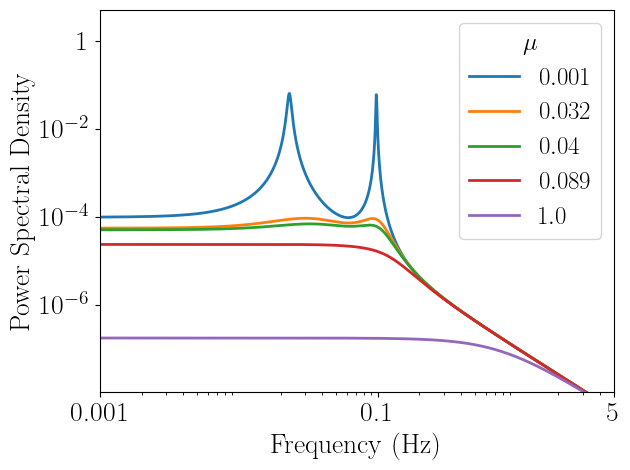

In [20]:
"""Plot the analytical power spectrum for different mu"""
plt.figure(10)
plt.clf()
for i in range(mu_spect.size(0)):
    plt.loglog(freq, psd_mu[:, i], label=r'${}$'.format(torch.round(mu_spect[i], decimals=3)), linewidth=2)
plt.legend(fontsize=18, loc='upper right', title=r'$\mu$', title_fontsize=18)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Power Spectral Density', fontsize=20)
plt.xticks([1e-3, 1e-1, 5], ['0.001', '0.1', '5'], fontsize=20)
plt.yticks([1e-6, 1e-4, 1e-2, 1e0], ['$10^{-6}$','$10^{-4}$', '$10^{-2}$', '$1$'], fontsize=20)
plt.xlim([1e-3, 5])
plt.ylim([1e-8, 5])
plt.tight_layout()
plt.savefig(fileloc + 'psd_for_diff_mu.svg', format='svg', dpi=1200)
plt.show()

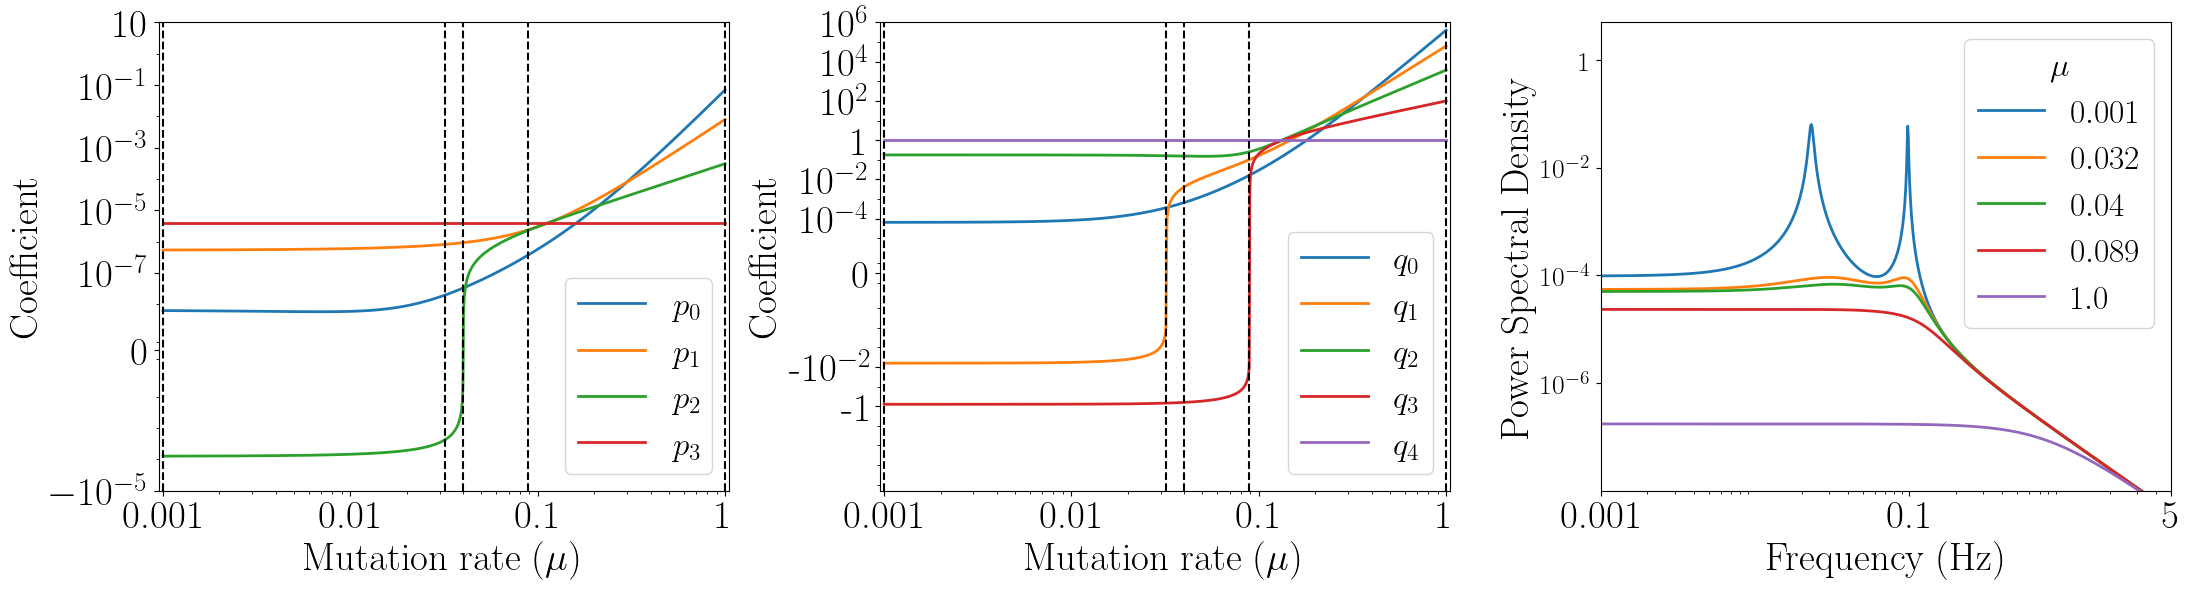

In [21]:
"""Combined figures"""
fig, ax = plt.subplots(1, 3, figsize=(22, 6))

for i in range(dim):
    ax[0].plot(mu, p[i, :], label=r'$p_{}$'.format(i), linewidth=2)
threshold = torch.min(torch.abs(p)).item()
ax[0].set_yscale('symlog', linthresh=threshold)
ax[0].set_xscale('log')
for i in range(mu_spect.size(0)):
    ax[0].axvline(mu_spect[i], color='k', linestyle='--')
ax[0].legend(fontsize=24, loc='lower right')
ax[0].set_xlabel('Mutation rate ($\mu$)', fontsize=font_size)
ax[0].set_ylabel('Coefficient', fontsize=font_size)
ax[0].set_xticks([1e-3, 1e-2, 1e-1, 1], ['0.001', '0.01', '0.1', '1'], fontsize=font_size)
ax[0].set_yticks([-1e-5, 0, 1e-7, 1e-5, 1e-3, 1e-1, 1e1], ['$-10^{-5}$', '0', '$10^{-7}$', '$10^{-5}$', '$10^{-3}$', '$10^{-1}$', '$10$'], fontsize=font_size)
ax[0].set_xlim([0.95e-3, 1.05])
# ax[0].set_ylim([1e-10, 1e-5])


for i in range(dim+1):
    ax[1].plot(mu, q[i, :], label=r'$q_{}$'.format(i), linewidth=2)
for i in range(mu_spect.size(0)):
    ax[1].axvline(mu_spect[i], color='k', linestyle='--')
threshold = torch.min(torch.abs(q)).item()
ax[1].set_yscale('symlog', linthresh=threshold)
ax[1].set_xscale('log')
ax[1].legend(fontsize=24, loc='lower right')
ax[1].set_xlabel('Mutation rate ($\mu$)', fontsize=font_size)
ax[1].set_ylabel('Coefficient', fontsize=font_size)
ax[1].set_xticks([1e-3, 1e-2, 1e-1, 1], ['0.001', '0.01', '0.1', '1'], fontsize=font_size)
ax[1].set_yticks([-1, -1e-2, 0, 1e-4, 1e-2, 1e0, 1e2, 1e4, 1e6], ['-1','-$10^{-2}$','0','$10^{-4}$', '$10^{-2}$', '$1$', '$10^2$', '$10^4$', '$10^6$'], fontsize=font_size)
ax[1].set_xlim([0.95e-3, 1.05])
# ax[1].set_ylim([1e-10, 1e-5])


for i in range(mu_spect.size(0)):
    ax[2].loglog(freq, psd_mu[:, i], label=r'${}$'.format(torch.round(mu_spect[i], decimals=3)), linewidth=2)
ax[2].legend(fontsize=24, loc='upper right', title=r'$\mu$', title_fontsize=24)
ax[2].set_xlabel('Frequency (Hz)', fontsize=font_size)
ax[2].set_ylabel('Power Spectral Density', fontsize=font_size)
ax[2].set_xticks([1e-3, 1e-1, 5], ['0.001', '0.1', '5'], fontsize=font_size)
ax[2].set_yticks([1e-6, 1e-4, 1e-2, 1e0], ['$10^{-6}$','$10^{-4}$', '$10^{-2}$', '$1$'], fontsize=20)
ax[2].set_xlim([1e-3, 5])
ax[2].set_ylim([1e-8, 5])


plt.tight_layout()
plt.savefig(fileloc + 'combined_coeff_plots.svg', format='svg', dpi=1200)
plt.show()